## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing
https://keras.io/api/data_loading/image/

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',           #directory: Directory where the data is located
    labels="inferred", #if i say labels = "inferred", means that im saying to tensorflow to go inside train folder (whatever the name of the directory is) and select it as my label
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',           #directory: Directory where the data is located
    labels="inferred", #if i say labels = "inferred", means that im saying to tensorflow to go inside train folder (whatever the name of the directory is) and select it as my label
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x, x.shape) #training example
    print(y, y.shape) #level
    break
# (32, 128, 128, 3) - it's feeding 32 images of the training set and 32 levels of the training set, 128x128 - the size of the image, 3- the color of the image (R,G,B)

tf.Tensor(
[[[[162.5  164.5  176.5 ]
   [190.75 192.75 204.75]
   [181.25 183.25 195.25]
   ...
   [127.25 125.25 138.25]
   [135.   133.   146.  ]
   [135.   133.   146.  ]]

  [[166.25 168.25 180.25]
   [177.   179.   191.  ]
   [173.75 175.75 187.75]
   ...
   [134.5  132.5  145.5 ]
   [133.   131.   144.  ]
   [133.   131.   144.  ]]

  [[181.   183.   195.  ]
   [168.25 170.25 182.25]
   [185.75 187.75 199.75]
   ...
   [137.75 135.75 148.75]
   [140.5  138.5  151.5 ]
   [139.25 137.25 150.25]]

  ...

  [[129.5  131.5  144.5 ]
   [128.75 130.75 143.75]
   [140.5  142.5  155.5 ]
   ...
   [118.75 116.75 129.75]
   [127.   125.   138.  ]
   [118.   116.   129.  ]]

  [[135.   137.   150.  ]
   [135.25 137.25 150.25]
   [135.5  137.5  150.5 ]
   ...
   [103.75 101.75 114.75]
   [125.25 123.25 136.25]
   [107.5  105.5  118.5 ]]

  [[133.   135.   148.  ]
   [135.25 137.25 150.25]
   [135.5  137.5  150.5 ]
   ...
   [ 99.25  97.25 110.25]
   [111.25 109.25 122.25]
   [124.25 122.25 13

### To avoid Overshooting
1. Choose small learning rate, the default is 0.001, we are taking 0.0001
2. There may be chance of Underfitting so increase the number of neurons
3. Add more Convolution layers to extract more features from images, there may be posibility that the model is unable to capture relevant feautures or the model is confused due to lack of feature so feed more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
# Building Convolution Layer 
# https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [128,128,3])) # we are gonna get 32 different feature maps, kernel_size = 3 means 3x3 chapi matrix nayelov a gnalu (cheatsheeti meji kapuyti size@)
# input_shape and the image_size that we've given need to be the same + the rgb format which is 3, verjin argumenty petq e miayn tal arajin layeri jamanak
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# padding: string, either "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
# padding ='same' - we are saying please make our feauture map in such a way that its size is same as our input siza, dra hamar menak arajin layerum enq toxnum, vor chcanrabernvi
# after convolution operation im gonna apply max pooling
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.25))
# it's saying that whatever layers you are getting drop 25% from them

In [15]:
# now we have to flatten our output and feed to our neural network
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu'))
# Dense layer is basically our hidden layer, units means how many number of neurons i want

In [17]:
model.add(Dropout(0.4))
# adding one more dropout layer here cz we are trying to avoid the problem of overfitting cz making the model more complex leads to overfitting
# so we have to stick inbetween overfitting and underfitting

In [18]:
# Output Layer
model.add(Dense(units=38, activation='softmax'))
# aystex vorpes unitsi qanak vercnum enq skzbum run arac training seti classneri qanaky, so we need 38 different outputs
# each model will predict the probability of each class, so 38 neurons at the output side
# softmax so that this neuron will give me a probability of each class in each neuron and if we do the some of all probabilities we'll get 1
# From that our aim is to select that class which is having maximum probability and then we'll say the model is saying that this is the disease
# that's why we are using softmax, cz we need results in probability form


### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
def model_summary_with_memory(model):
    model.summary()
    total_params = model.count_params()
    memory_mb = (total_params * 4) / (1024 ** 2)
    print(f"\nModel Memory Usage: {memory_mb:.2f} MB")


model_summary_with_memory(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [21]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 13916s 6s/step - loss: 1.3517 - accuracy: 0.6031 - val_loss: 0.4959 - val_accuracy: 0.8431
Epoch 2/10
2197/2197 [==============================] - 9692s 4s/step - loss: 0.4106 - accuracy: 0.8695 - val_loss: 0.2999 - val_accuracy: 0.9051
Epoch 3/10
2197/2197 [==============================] - 12334s 6s/step - loss: 0.2489 - accuracy: 0.9186 - val_loss: 0.3161 - val_accuracy: 0.9031
Epoch 4/10
2197/2197 [==============================] - 52055s 24s/step - loss: 0.1693 - accuracy: 0.9447 - val_loss: 0.2693 - val_accuracy: 0.9170
Epoch 5/10
2197/2197 [==============================] - 13968s 6s/step - loss: 0.1288 - accuracy: 0.9572 - val_loss: 0.1490 - val_accuracy: 0.9525
Epoch 6/10
2197/2197 [==============================] - 13435s 6s/step - loss: 0.1033 - accuracy: 0.9656 - val_loss: 0.1365 - val_accuracy: 0.9582
Epoch 7/10
2197/2197 [==============================] - 6817s 3s/step - loss: 0.0860 - accuracy: 0.9718 - val_loss: 0.

## Model Evaluation

In [22]:
# Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 993s 452ms/step - loss: 0.0388 - accuracy: 0.9869


In [23]:
print(train_loss, train_acc)

0.038834016770124435 0.9868553876876831


In [24]:
# Model on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 187s 338ms/step - loss: 0.1289 - accuracy: 0.9624


In [25]:
print(val_loss, val_acc)

0.12891441583633423 0.9624402523040771


### Saving Model

In [26]:
# If we wanna use this model for future prediction or if we are gonna build any web app then we cant run this model every time 
# and use this model cz if we are gonna fit this model then this fitting will take almost 30 minutes based on your data set
# Thats why you have to save this model so if you wanna use this model in the future you can directly load and use that model
model.save("trained_model.h5")
# it'll save all the parameters whatever we are getting after this final epoch which is the 10th epoch
# whatever weights im getting for each epoch will be saved here and inside this i will pass the location , so im saying in the same hierarchy save 
# this model as trained model.h5, so we are saving this model in the form of h5 file. model.save("trained_model.h5")
# or we can save it as model.save("trained_model.keras"), but the size of this is so much more compressed: if the h5 is 90Mb, then the keras one is 30MB


In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history # amen epochi hamar valuenery berum a

{'loss': [1.3516594171524048,
  0.41061732172966003,
  0.24894459545612335,
  0.16928015649318695,
  0.1287866085767746,
  0.10328973084688187,
  0.0860389992594719,
  0.0687975361943245,
  0.0632820576429367,
  0.05333884432911873],
 'accuracy': [0.6030585169792175,
  0.8694643974304199,
  0.9186002016067505,
  0.9446902275085449,
  0.9571662545204163,
  0.9655594229698181,
  0.9718472361564636,
  0.9776086211204529,
  0.9795433282852173,
  0.9829006195068359],
 'val_loss': [0.4958987832069397,
  0.29993176460266113,
  0.31605711579322815,
  0.2692778706550598,
  0.14897385239601135,
  0.13648942112922668,
  0.11465311050415039,
  0.19264167547225952,
  0.1650264412164688,
  0.12891443073749542],
 'val_accuracy': [0.8431026339530945,
  0.9051331877708435,
  0.9030844569206238,
  0.9170271158218384,
  0.952481210231781,
  0.9582290053367615,
  0.9643182158470154,
  0.9428067207336426,
  0.9511722922325134,
  0.9624402523040771]}

In [30]:
# Recording History in json

# if we wanna visualize in the future then we don't need to perform this training, that's why im recording this history, cz 
# we cant train this model every time, it's very time-taking process, so im recording my record history in json format

import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f) # store whatever is returned by this: training_history.history in f, which is your training_hist.json

### Accuracy Visualization

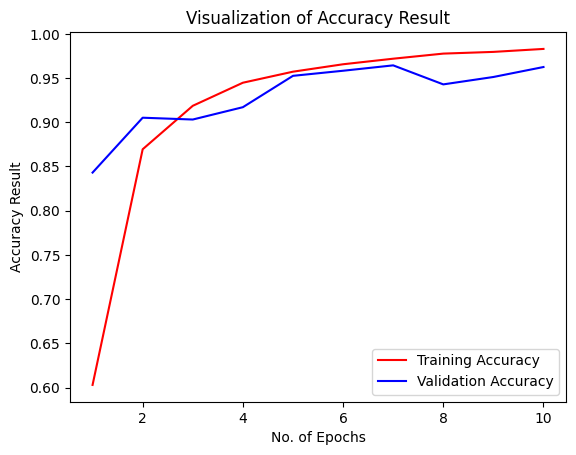

In [36]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [37]:
# for each epoch this is the variation of our training accuracy

### Some other metrics for model evaluation

In [38]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',           #directory: Directory where the data is located
    labels="inferred", #if i say labels = "inferred", means that im saying to tensorflow to go inside train folder (whatever the name of the directory is) and select it as my label
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [41]:
y_pred = model.predict(test_set) # it's giving me the probability of all the 38 classes for each image
y_pred, y_pred.shape

550/550 [==============================] - 141s 257ms/step


(array([[9.99973893e-01, 4.58192147e-07, 7.78987186e-08, ...,
         9.96078762e-13, 6.77265373e-13, 1.00764978e-11],
        [9.99995708e-01, 4.27576197e-06, 7.38035633e-09, ...,
         3.48127238e-15, 2.83988918e-16, 1.29673985e-14],
        [1.00000000e+00, 4.59118743e-09, 5.79193582e-10, ...,
         7.14636693e-19, 1.21724008e-16, 4.06992851e-15],
        ...,
        [1.87330307e-09, 4.79097650e-10, 9.64178781e-08, ...,
         6.88311852e-09, 1.31384795e-07, 9.99980211e-01],
        [3.54453532e-12, 2.27497464e-13, 1.34415046e-09, ...,
         2.16884913e-11, 9.41332706e-11, 9.99999881e-01],
        [8.40787301e-11, 1.48240378e-10, 5.75848431e-11, ...,
         2.03043203e-12, 1.21412380e-10, 9.99991298e-01]], dtype=float32),
 (17572, 38))

In [42]:
# for each image it's giving 38 probabilities


In [43]:
# our task is to select the maximum probability class

In [44]:
predicted_categories = tf.argmax(y_pred, axis=1)
# the argmax function will go inside this y_pred and it'll extract the maximum value from this and it'll return the index of that maximum value
# axis=1 means return the index in column-wise fashion - vertically count the maximum value
# axis=0 it will perform this operation in row-wise fashion 

In [45]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
# vereviny shows that the model is saying it belongs to class zero and we are also passing this from

In [47]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [48]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [50]:
# Recall: the ability of a classification model to identify all data points in a relevant class. 
# Precision: the ability of a classification model to return only the data points in a class. 
# F1 Score: a single metric that combines recall and precision using the harmonic mean.

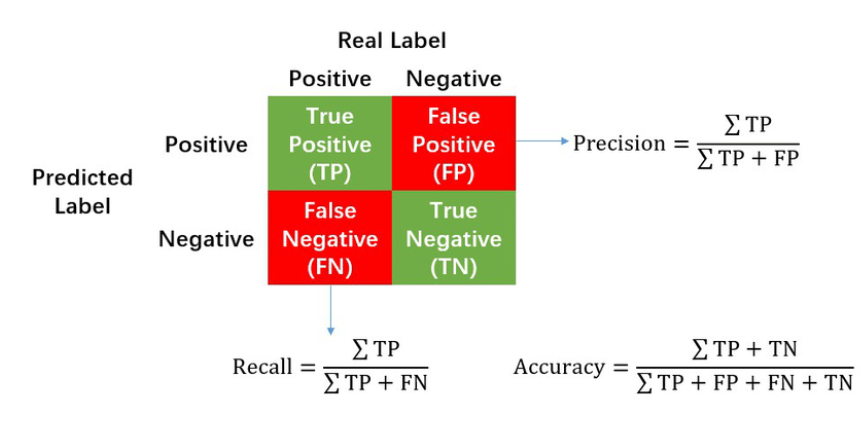
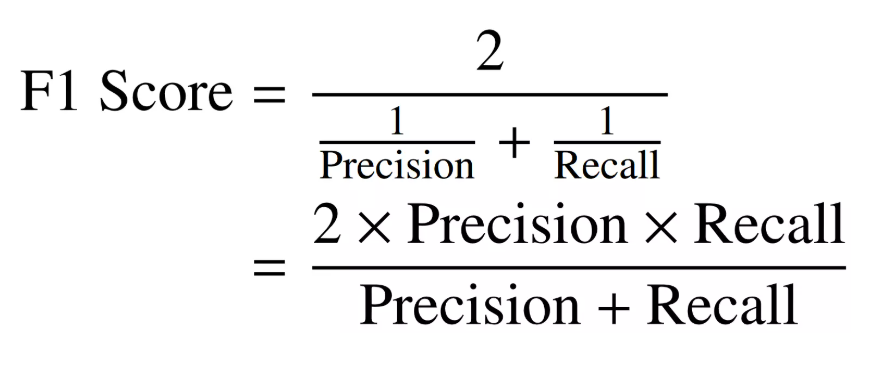

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [52]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.94      0.95       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.91      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [53]:
# Now we'll calculate the confusion matrix for our model

In [55]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[475,   9,   0, ...,   0,   2,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 426, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 473,   0,   0],
       [  0,   0,   0, ...,   0, 445,   1],
       [  0,   0,   0, ...,   0,   0, 477]], dtype=int64)

In [56]:
cm.shape

(38, 38)

In [57]:
# (38, 38) - predicted categories x true categories

### Confusion Matrix Visualization
https://seaborn.pydata.org/generated/seaborn.heatmap.html

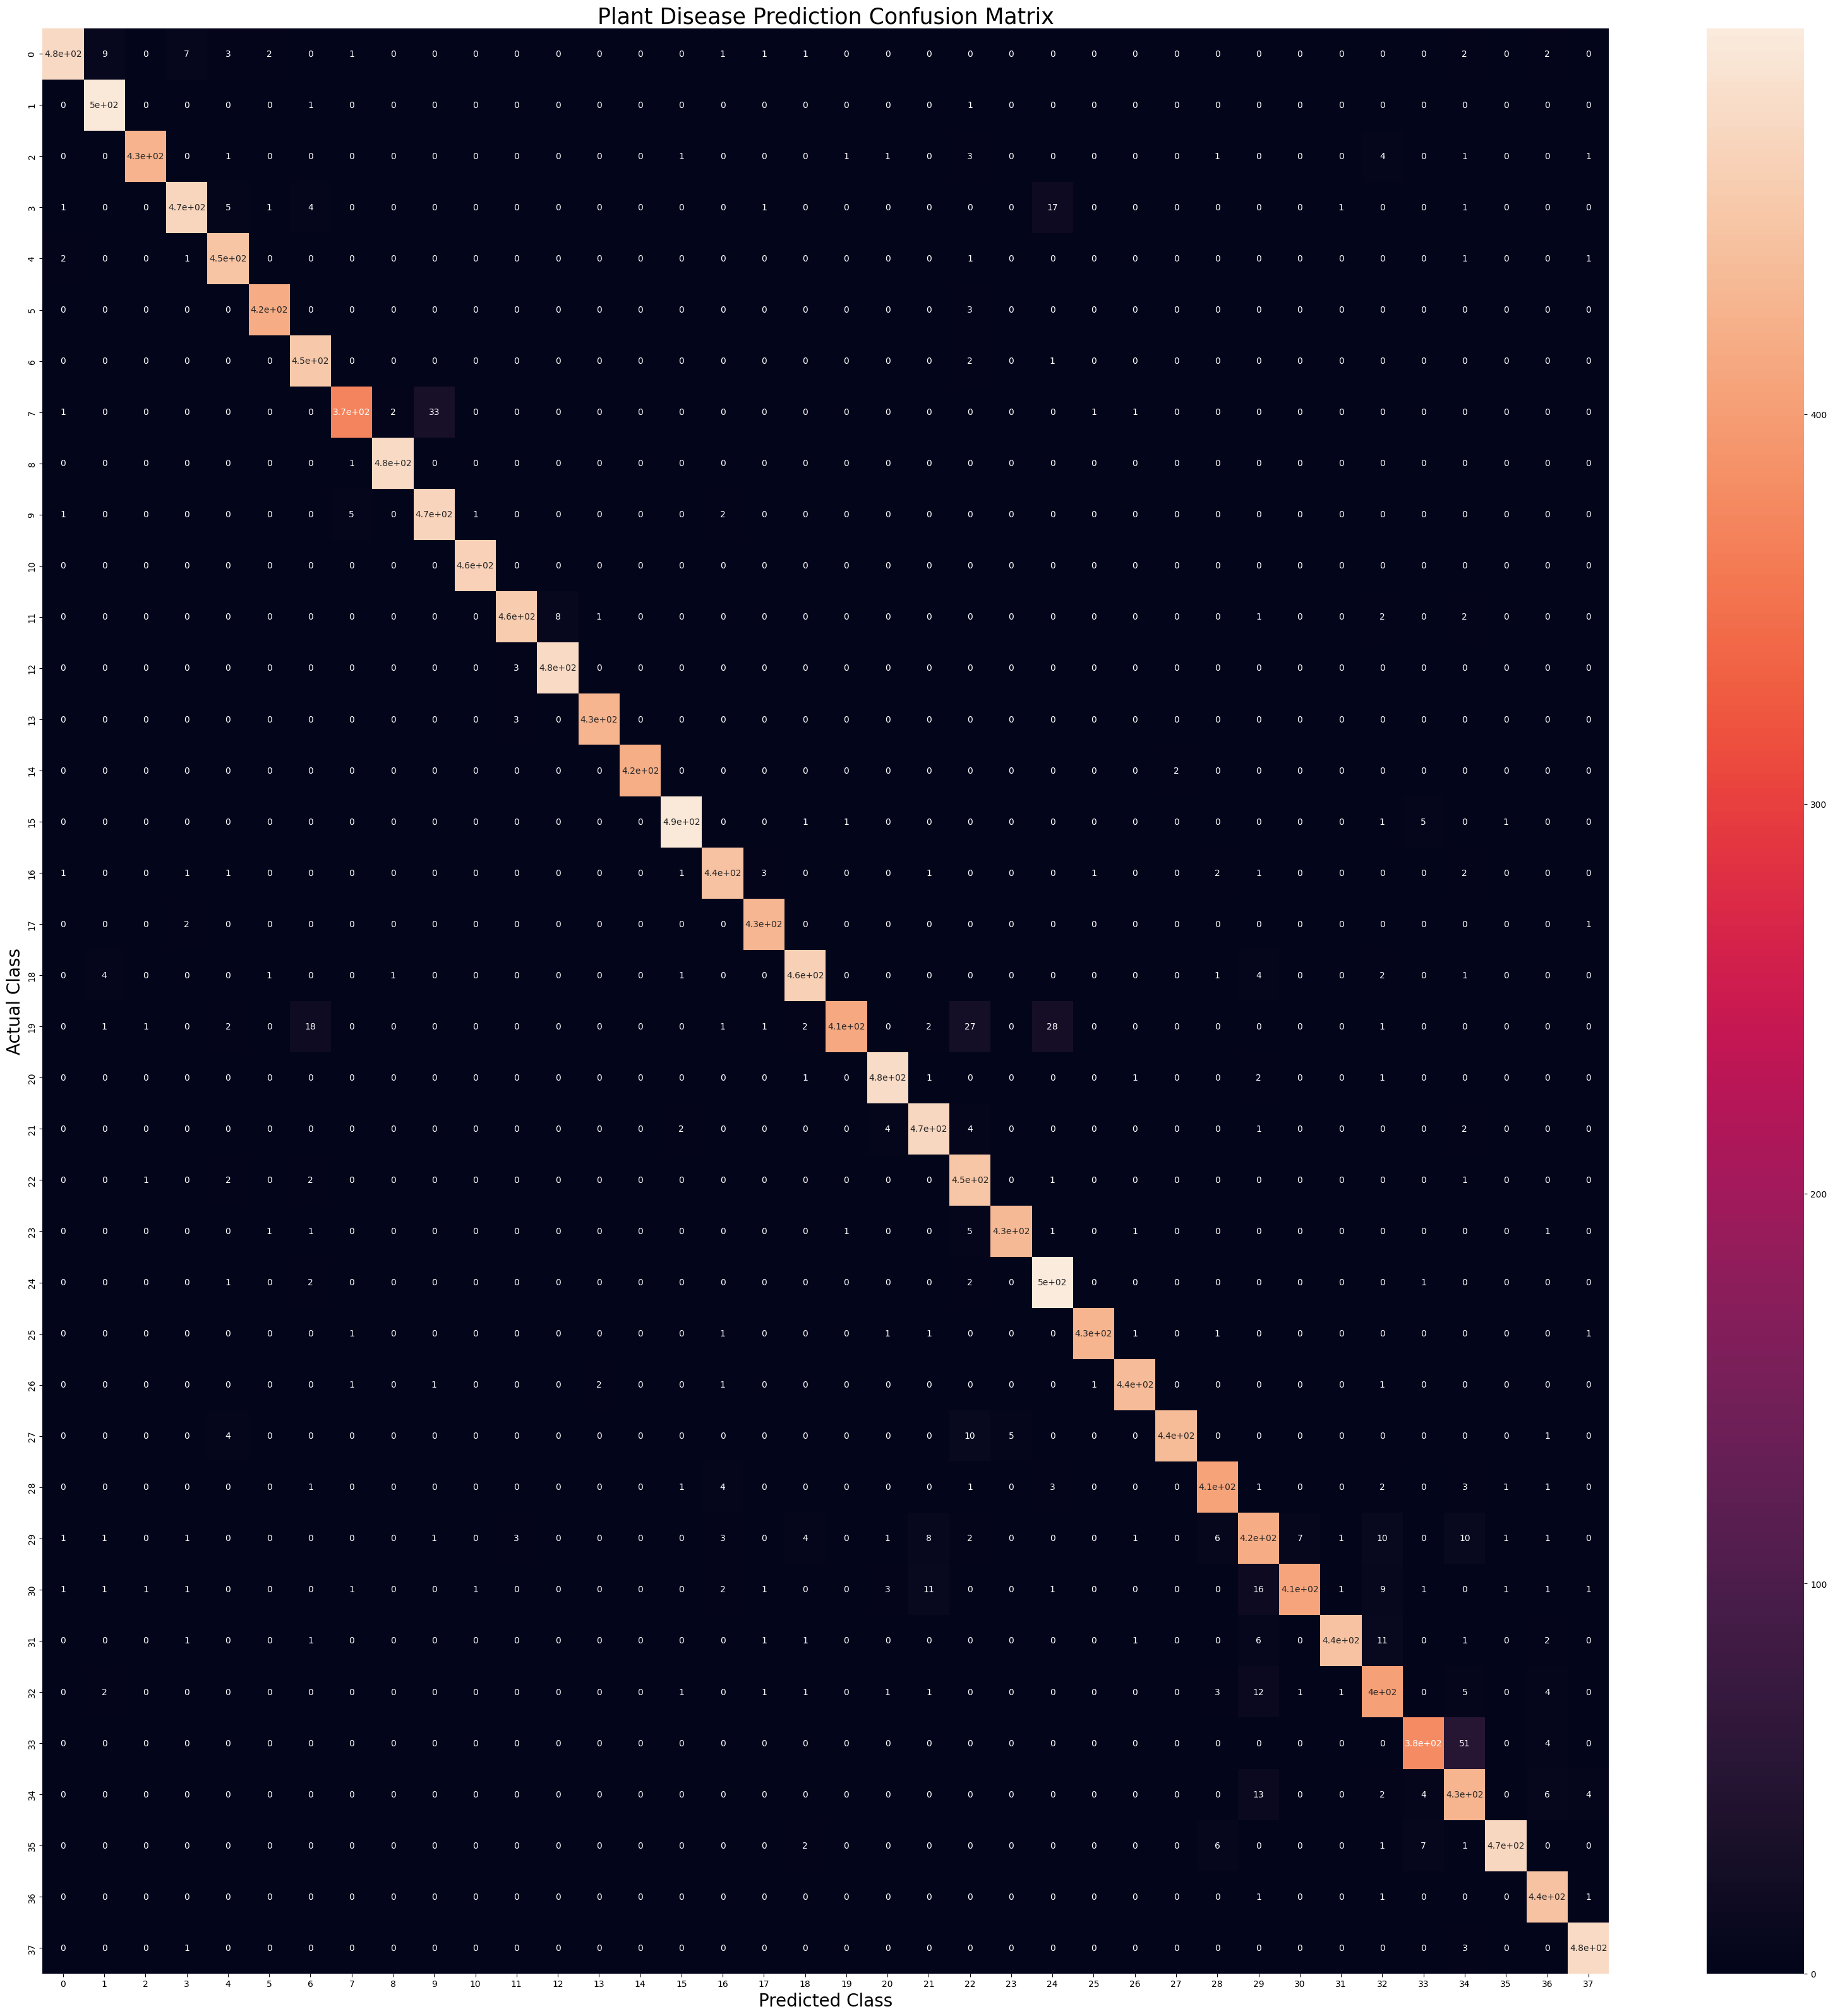

In [66]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()

In [ ]:
# now we are gonna feed each image of test folder to our neural network